In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns 
from pandas.api.types import is_numeric_dtype

In [10]:
path= '../../datasets/main_data/bank-additional-full.csv'
full_bank = pd.read_csv(path, sep=';')

#### Module Data.py codes

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as  np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import IsolationForest
import os
from sklearn.preprocessing import RobustScaler, StandardScaler

def load_data(path="", sep=",", cols_to_drop=[]):
    data = pd.read_csv(path, sep)
    for col in cols_to_drop:
        data.drop(col, axis=1, inplace=True)
    return data

def check_outliers(data, show_plot=False, save_img=os.getcwd()+'/outliers.png'):
    
    """
    This functions checks for columns with outlers using the IQR method
    
    It accespts as argmuent a dataset. 
    show_plot can be set to True to output pairplots of outlier columns    
    """
    
    outliers = [] 
    Q1 = data.quantile(0.25)  
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    num_data = data.select_dtypes(include='number')
    result = dict ((((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))==True).any())
    #data[(data[col] >= high)|(data[col] <= low)].index
    index = data[(num_data < Q1 - 1.5 * IQR) | (num_data > Q3 + 1.5 * IQR)].index
    for k,v in result.items():
        if v == True:  
            outliers.append(k)
    if show_plot:
        pair_plot = sns.pairplot(data[outliers]);
        print(f'{result},\n\n Visualization of outlier columns')
        plt.savefig(fname=save_img, format='png')
        return pair_plot
    else:
        return data.loc[index, outliers]
    
    

def treat_outliers(data, type='median_replace'):
    
    """
    This treat outliers using any ofthses 3 methods as specified by user
    
        1. median_replace -  median replacement
        
        2. quant_floor - quantile flooring
        
        3. trim - trimming 
        
        4. log_transform - log transformations
    
    The methods are some of the commont statistical methods in treating outler
    columns
    
    By default treatment type is set to median replacement

    """
    
    if type == "median_replace":
        
        for col in data.columns.tolist():
            if is_numeric_dtype(data[col]):
                median = (data[col].quantile(0.50))
                print(median)
                q1 = data[col].quantile(0.25)
                q3 = data[col].quantile(0.75)
                iqr = q3 - q1
                high = int(q3 + 1.5 * iqr) 
                low = int(q1 - 1.5 * iqr)
                print(high, low, iqr)
                print(col)
                data[col] = np.where(data[col] > high, median, data[col])
                data[col] = np.where(data[col] > high, median, data[col])        
    
    if type == "quant_floor":
        
        for col in data.columns.tolist():
            if is_numeric_dtype(data[col]):
                q_10 = data[col].quantile(0.5)
                q_90 = data[col].quantile(0.95)
                data[col] =  data[col] = np.where(data[col] < q_10, q_10 , data[col])
                data[col] =  data[col] = np.where(data[col] > q_90, q_90 , data[col])
            
    if type == "trim":
        
        for col in data.columns.tolist():
            low = .05
            high = .95
            quant_df = data.quantile([low, high])
            for name in list(data.columns):
                if is_numeric_dtype(data[name]):
                    data = data[(data[name] >= quant_df.loc[low, name]) 
                        & (data[name] <= quant_df.loc[high, name])]
            
    if type == "log_transform":  
        for col in data.columns.tolist():
            if is_numeric_dtype(data[col]):
                data[col] = data[col].map(lambda i: np.log(i) if i > 0 else 0)
                
    if type == "isf":
        iso = IsolationForest(contamination=0.1)
        yhat = iso.fit_predict(data.select_dtypes(exclude='object'))
        #select all rows that are not outliers
        mask = yhat != -1 
        data = data[mask]
        

    return data 


def scale_data(data,scaler=RobustScaler()):
    
    """
    Specify scaler type, scaler type must have fit_transform as a method
    
    """
    data_scaled = scaler.fit_transform(data)
    return data_scaled

In [138]:
def check_imbalance(data,label='', x=0.7, y=30000):
    plt.subplots(figsize=(10,8))
    data[label].value_counts().plot(kind='bar')
    text = f'Class Imbalance Count:\n\n{data[label].value_counts().to_dict()}'
    plt.text(x=x, y=y, s = text ,  fontsize=15)

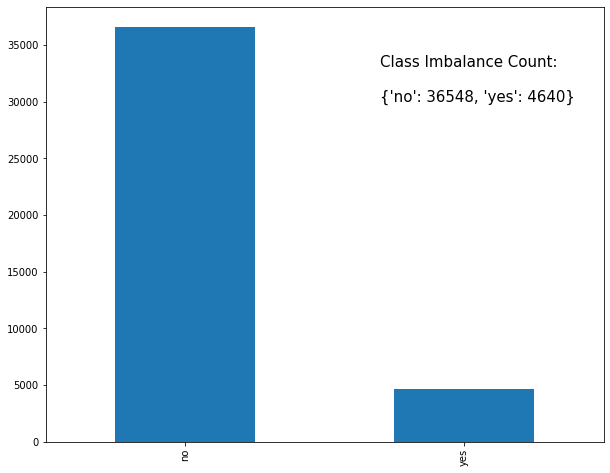

In [139]:
check_imbalance(full_bank, 'y')

In [118]:
treat_outliers(data=full_bank, type='isf')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40542,30,admin.,single,university.degree,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,yes
40544,33,blue-collar,married,professional.course,no,yes,no,cellular,aug,tue,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,yes
40545,31,admin.,single,high.school,no,no,no,cellular,aug,tue,...,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,no
40550,34,blue-collar,married,basic.9y,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,no


In [77]:
dfa = full_bank.copy()
dfb = full_bank.copy()
dfc = full_bank.copy()
dfd = full_bank.copy()
dfe = full_bank.copy()

In [78]:
dfa_= dfa.copy()

In [79]:
is_numeric_dtype(dfa['age'])

True

In [80]:
treat_outliers(dfa, type='median_replace')

38.0
69 9 15.0
age
180.0
644 -223 217.0
duration
2.0
6 -2 2.0
campaign
999.0
999 999 0.0
pdays
0.0
0 0 0.0
previous
1.1
6 -6 3.2
emp.var.rate
93.749
95 91 0.9189999999999969
cons.price.idx
-41.8
-26 -52 6.300000000000004
cons.conf.idx
4.857
10 -4 3.617
euribor3m
5191.0
5421 4905 129.0
nr.employed


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [81]:
check_outliers(dfa)

,duration,pdays,cons.conf.idx
0,261.0,999.0,-36.4
1,149.0,999.0,-36.4
2,226.0,999.0,-36.4
3,151.0,999.0,-36.4
4,307.0,999.0,-36.4
...,...,...,...
41183,334.0,999.0,-50.8
41184,383.0,999.0,-50.8
41185,189.0,999.0,-50.8
41186,442.0,999.0,-50.8


In [75]:
dfa.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

#### Module Plot.py codes

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import os

def plot_univariate (data, x=None, y=None, color='r',save=False,
                title='New Chart', chart_type='hist', xlabel='', ylabel='',
                    save_to=os.getcwd(), log_normalise=False):
    
    
    """
    Make a univariate plot of any of these selcted types:
    
    1. bar - barchart
    
    2. hist - Histogram
    
    3. pie - Piechart
    
    4. count - Countplot
    
    
    """
    
    plt.subplots(figsize=(10,7))
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    
    if chart_type == 'hist':
        if log_normalise:
            data = np.log(data)
        plot = sns.distplot(a=data, color=color)
        if save:
            plt.savefig(fname=save_to+f'/{title}.png', format='png')
        
    return plot

def plot_bivariate(data, x=None, y=None, hue=None, 
                  color='r',save=False,
                title='New Chart', chart_type='hist',
                   xlabel='', ylabel='',
                    save_to=os.getcwd(), img_name = " ", 
                   palette={'use':False, "size":1}, log_normalise=False,
                  kind_joint_plot = 'scatter', kind_pair_plot="scatter", figsize=(10,7)):
    
    """
    Make a bivariate plot of any of the selcted types:
    
    1. bar - barchart
    
    2. scatter  - scatter plot
    
    3. cat  - catplot
    
    4. count - countplot
    
    5 joint - jointplot 
    
    6  pair - pairplot
    
    7  corr - corr_plot
    
    When calling joint_plot:
        
        kind_joint_plot is default to `scatter`
        other types include "reg", "reside", "kde", "hex"
        
    When calling pair_plot:
        
        kind_pair_plot is default to `scatter`
        other types include 'reg'
    """
    def plt_tweaks():
        plt.subplots(figsize= figsize)
        plt.title(title, fontsize=18)
        plt.xlabel(xlabel, fontsize=15)
        plt.ylabel(ylabel, fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    
    
    # define helper functions
    
    def use_palette():
        palettes = []
#        palette_to_use=[]
        if palette['use'] == True:
            palette_to_use = [palettes[i] for i in range(palette['size'])]
            
            return palette_to_use

    def log_norm():
        if log_normalise and y != None:
            y = np.log(y)
        elif log_normalise and y == None:
            data = np.log(data)
            
    def save_image():
        if save:
            if img_name != " ":
                plt.savefig(fname=save_to+"/"+img_name+'.png', format='png')
            else:
                plt.savefig(fname=save_to+f'/{title}.png', format='png')
                
        
    # make plots
    
    if chart_type == "joint":
        log_norm()
        plot = sns.jointplot(x=x, y=y, data=data,
                            height=6, ratio=5, space=0.2, kind=kind_joint_plot)
        
        save_image()
        
    if chart_type == "pair":
       # try:
        log_norm()
        if palette['use'] == True:
            palette_to_use = use_palette()
            plot = sns.pairplot(data, palette=palette_to_use, 
                            kind= kind_pair_plot,height=3, aspect=1, hue=hue)
        else:
             plot = sns.pairplot(data, 
                            kind= kind_pair_plot,height=2.5, aspect=1, hue=hue, )
        save_image()
        
    if chart_type  == "corr":
        plt_tweaks()
        corr_data = data.corr()
        corr_plot = sns.heatmap(corr_data,annot=True, fmt='.2g', center=0) 
        
    return plot

In [106]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [107]:
lof = LocalOutlierFactor()
ee = OneClassSVM(nu=0.01)
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(full_bank.select_dtypes(exclude='object'))
# select all rows that are not outliers
mask = yhat != -1
print(mask)
X_train = full_bank[mask]
# summarize the shape of the updated training dataset
print(X_train.shape)

[ True  True  True ... False False False]
(37069, 21)


In [108]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40830,48,services,married,basic.6y,no,no,no,cellular,sep,mon,...,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40831,32,admin.,married,high.school,no,no,no,cellular,sep,mon,...,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
40839,48,unemployed,married,professional.course,no,yes,no,cellular,sep,mon,...,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40843,30,student,single,professional.course,no,no,no,telephone,sep,tue,...,2,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,no


In [109]:
check_outliers(X_train)

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0
...,...,...,...,...,...
40830,48,188,2,999,0
40831,32,169,2,999,0
40839,48,315,2,999,0
40843,30,237,2,999,0


#### Module Model.py Codes

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca_components(data):
    pca = PCA().fit(data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
def check_imbalance(data,label='', x=0.7, y=30000):
    plt.subplots(figsize=(10,8))
    data[label].value_counts().plot(kind='bar')
    text = f'Class Imbalance Count:\n\n{data[label].value_counts().to_dict()}'
    plt.text(x=x, y=y, s = text ,  fontsize=15)
    
def encode (data):
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', )
    to_encode = data.select_dtypes(exclude='number')
    if data.shape[1] > 1:
        #ohe = MultiLabelBinarizer()
        data.drop(to_encode.columns.tolist(), axis=1, inplace = True)
        features_cat_encode = pd.DataFrame(ohe.fit_transform(to_encode))
        data = data.merge(features_cat_encode, left_index=True, right_index=True)
        #print(ohe.classes_) 
    else:
        data = pd.DataFrame(ohe.fit_transform(to_encode))
        print(ohe.categories_) 
    return data 

#### Modules Libraries.py Codes

In [111]:
def ana_viz():
    import pandas as pd 
    import numpy as np
    %matplotlib inline 
    import matplotlib.pyplot as plt
    import seaborn as sns 
    from pandas.api.types import is_numeric_dtype
    return pd, np, plt, sns, is_numeric_dtype